In [2]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image

Mounted at /content/drive


#Estructurando un Proyecto de DS Parte I

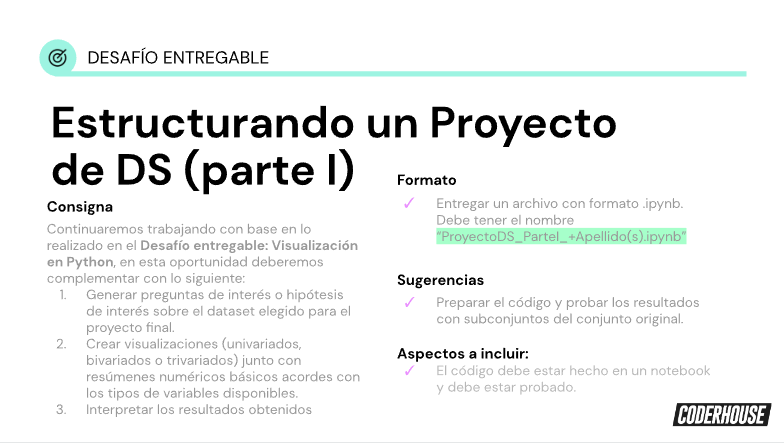

In [3]:
Image("/content/drive/MyDrive/DataScience/Tercer entrega/Screenshot_1.png")

# Introduccion 

Para esta tercer entrega se continuara trabajando con el dataset de StarcraftII y se buscara hacer un modelo de regresion lineal con las variables de mayor relevancia para determinar cual es division en la que se encuentra el jugador.

#Desarrollo

Lo primero que se hara sera instalar e importar las librerias necesarias para trabajar.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as sm

In [5]:
data_sc = pd.read_csv(r'/content/drive/MyDrive/DataScience/Segunda entrega/SkillCraft.csv')

Continuando con lo realizado en la segunda entrega "Visualizaciones con Python" ahora se procedera a intentar predecir el valor de las variables visualizadas anteriormente utilizando un modelo de regresion lineal

Primero recordemos la forma de nuestro dataset

In [6]:
data_sc.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


Al igual que se hizo en la entrega anterior, se comenzara analizando la cantidad de horas por semana de los jugadores

Text(0.5, 0, 'Horas semanales')

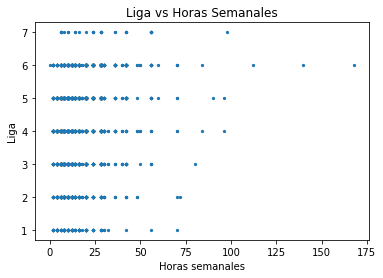

In [7]:
fig , ax = plt.subplots()
ax.scatter(data_sc['HoursPerWeek'],data_sc['LeagueIndex'],s=5)
ax.set_title("Liga vs Horas Semanales")
ax.set_ylabel("Liga")
ax.set_xlabel("Horas semanales")

Viendo el grafico ya podemos ver que no hay una relacion lineal que se aprecie a simple vista entre las variables, ademas se aprecia que hay ciertos valores que destacan, por lo que se filtraran los valores menores a 100 horas y veremos que dice el modelo.

In [8]:
model_hours_per_week = sm.ols(formula = 'LeagueIndex~HoursPerWeek', data = data_sc.query("HoursPerWeek < 100")).fit()
print(model_hours_per_week.summary())

                            OLS Regression Results                            
Dep. Variable:            LeagueIndex   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     164.9
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           7.09e-37
Time:                        18:40:08   Log-Likelihood:                -5885.1
No. Observations:                3335   AIC:                         1.177e+04
Df Residuals:                    3333   BIC:                         1.179e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.6817      0.042     87.790   

Viendo los valores devueltos por el modelo podemos ver que cumple la condicion de que el p-value sea menor a 0.05, aun asi no es un modelo muy representativo de la realidad y no es muy util para ajustar los datos debido a que el valor del parametro R-squared esta muy alejado de 1.

Veamos los datos en comparacion con el modelo en un grafico.

In [9]:
def func(x):
  return(3.6817+x*0.0277)

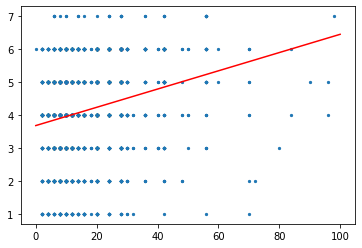

In [10]:
x = np.arange(0,101)

fig,ax = plt.subplots()
ax.scatter(data_sc.query("HoursPerWeek < 100")['HoursPerWeek'],data_sc.query("HoursPerWeek < 100")['LeagueIndex'],s=5)
ax.plot(x, [func(i) for i in x],color="red")

En el grafico se observa muy claramente lo poco representa el modelo a la realidad por lo que se tendra que utilizar otro modelo que se ajuste mejor a los datos.

Para continuar se realizara el mismo procedimiento pero con otra variable, en este caso la variable a utilizar sera el registro de horas historicas de cada jugador, asi veremos que tan relevante es el factor antiguedad en el juego.

Text(0.5, 0, 'Horas totales')

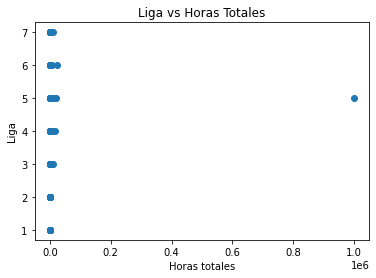

In [11]:
fig , ax = plt.subplots()
ax.scatter(data_sc['TotalHours'],data_sc['LeagueIndex'])
ax.set_title("Liga vs Horas Totales")
ax.set_ylabel("Liga")
ax.set_xlabel("Horas totales")

Podemos ver como el grafico no nos es de demasiada ayuda debido a un valor extremadamente elevado, de hecho, haciendo los calculos, sale que el jugador estuvo mas de 4100 dias, es decir, mas de 10 años enteros jugando, lo cual es claramente imposible para el tiempo que tiene el juego desde su lanzamiento (2010).

Debido a este motivo, de forma provisoria y arbitraria se pondra un limite superior a la cantidad de horas que se consideraran para el analisis, en el futuro se buscara de forma estadistica y fundamentada cual debe ser este valor para que el modelo ajuste de la mejor forma posible a los datos.

Text(0.5, 0, 'Horas totales')

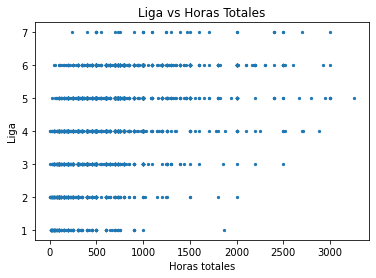

In [12]:
fig , ax = plt.subplots()
ax.scatter(data_sc.query("TotalHours <3500")['TotalHours'],data_sc.query("TotalHours <3500")['LeagueIndex'], s=5)
ax.set_title("Liga vs Horas Totales")
ax.set_ylabel("Liga")
ax.set_xlabel("Horas totales")

Al igual que pasa con las horas semanales, a pesar de ver un aumento en las horas a medida que se avanza de division no parece que un modelo lineal pueda ajustar demasiado bien a los datos.

In [13]:
model_total_hours = sm.ols(formula = 'LeagueIndex~TotalHours', data = data_sc.query("TotalHours < 3000")).fit()
print(model_total_hours.summary())

                            OLS Regression Results                            
Dep. Variable:            LeagueIndex   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     825.7
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          2.52e-162
Time:                        18:40:09   Log-Likelihood:                -5560.9
No. Observations:                3314   AIC:                         1.113e+04
Df Residuals:                    3312   BIC:                         1.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2503      0.038     86.547      0.0

In [14]:
def func(x):
  return(3.2503+x*0.0014)

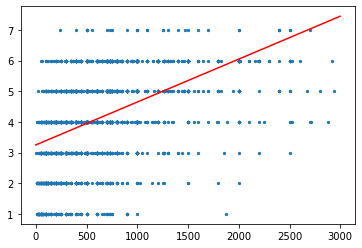

In [15]:
x = np.arange(0,3000)

fig,ax = plt.subplots()
ax.scatter(data_sc.query("TotalHours < 3000")['TotalHours'],data_sc.query("TotalHours < 3000")['LeagueIndex'], s=5)
ax.plot(x, [func(i) for i in x],color="red")

Como se puede observar en el grafico y nos lo indica el modelo, el ajuste no es representativo de la reallidad. 
A pesar de que el p-value es 0, el valor de R-squared es apenas de 0.200, muy alejado del valor de 1.
Ademas la libreria utilizada para calcular estos valores nos advierte de que esta variable tiene una alta colinealidad con las demas, por lo que puede que lo mejor sea no utilizarla a la hora de intentar hacer predicciones.


Para finalizar observaremos brevemente el ajuste de todas las variables para seleccionar los que mejor ajustan de forma lineal y que no tengan multicolinealidad para hacer un modelo utilizando esas variables 

                            OLS Regression Results                            
Dep. Variable:            LeagueIndex   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     55.14
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           1.42e-13
Time:                        19:38:57   Log-Likelihood:                -5944.6
No. Observations:                3338   AIC:                         1.189e+04
Df Residuals:                    3336   BIC:                         1.191e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0712      0.130     38.892      0.0

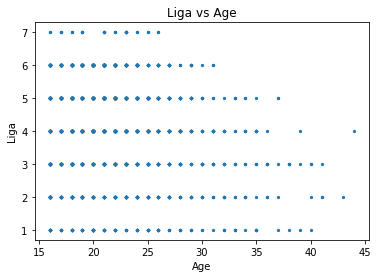

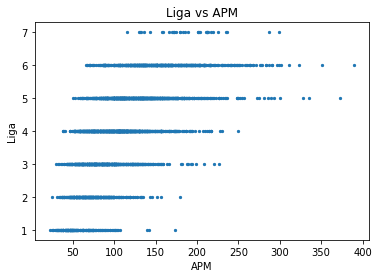

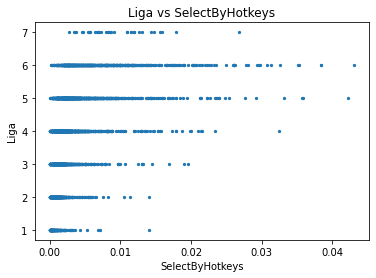

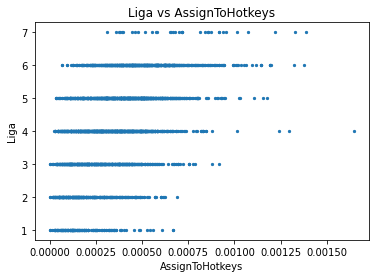

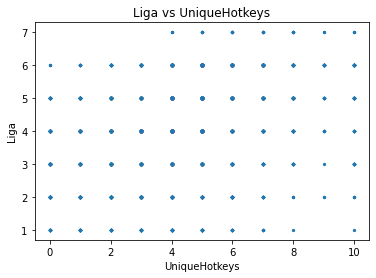

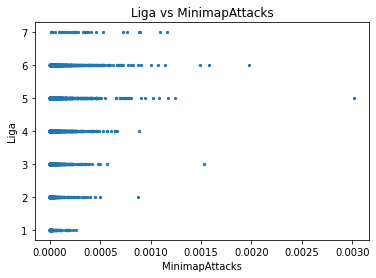

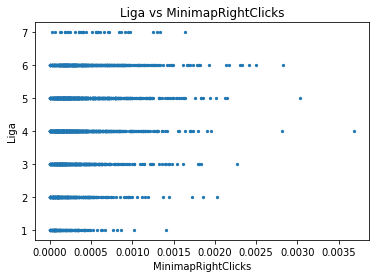

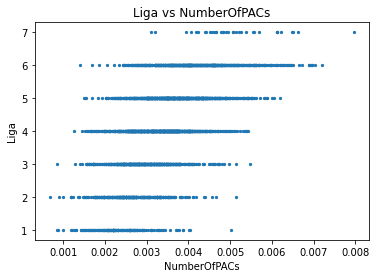

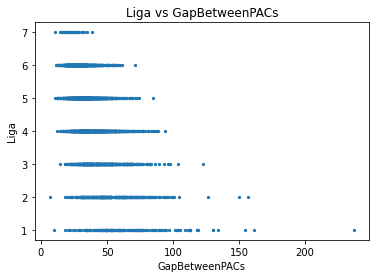

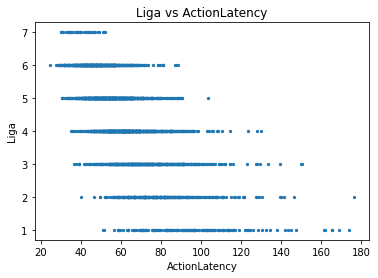

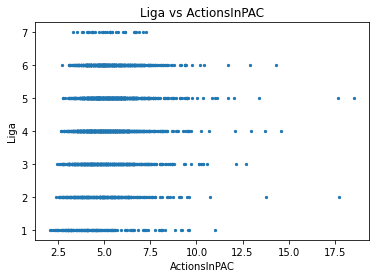

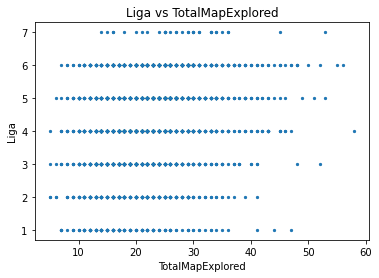

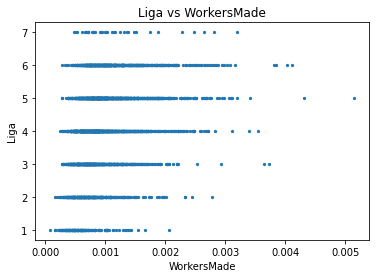

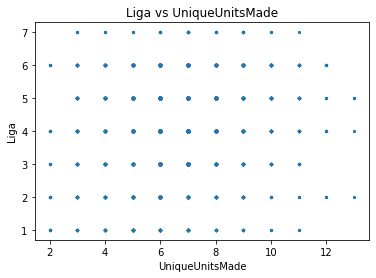

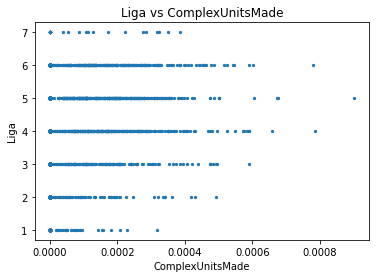

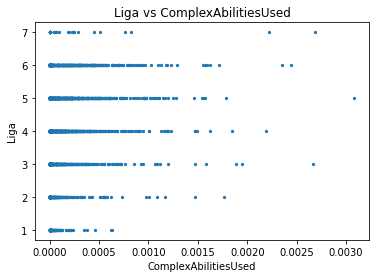

In [40]:
for i in data_sc.columns:
  if i == "GameID" or i == "LeagueIndex" or i == "TotalHours" or i == "HoursPerWeek":
    pass
  else:
    temp = "LeagueIndex~"+str(i)
    model = sm.ols(formula = temp, data = data_sc).fit()
    print(model.summary())

    fig , ax = plt.subplots()
    ax.scatter(data_sc[i],data_sc["LeagueIndex"], s=5)
    temp = "Liga vs "+i
    ax.set_title(temp)
    ax.set_ylabel("Liga")
    ax.set_xlabel(i)

Haciendo un analisis rapido de los graficos vemos que a pesar de haber datos anomalos, no hay ningungo extremadamente fuera de lo normal como lo fue en el caso de las horas totales, por lo que para un primer analisis se utilizaran todos los datos.

Como podemos se puede observar en los modelos, la mayoria de estos no ajustan para nada bien a los datos.

Para hacer el modelo multivariado se utilizaran todas las variables que superen el 0.15 de R-squared, este valor de momento es arbitrario pero en el futuro se tomara una decision con fundamentos de cual sera el valor de corte.

Las variables que cumplen con esta condicion son: APM, SelectByHotkeys, AssignToHotkeys, GapBetweenPACs, ActionLatency y NumberOfPACs 

In [39]:
model = sm.ols(formula = 'LeagueIndex ~ APM + SelectByHotkeys + AssignToHotkeys + GapBetweenPACs + ActionLatency + NumberOfPACs ', data = data_sc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LeagueIndex   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     584.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:31:15   Log-Likelihood:                -4771.8
No. Observations:                3338   AIC:                             9558.
Df Residuals:                    3331   BIC:                             9600.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.3201      0.250     

#Conclusion

Podemos observar que el valor de R-squared es de 0.513, lo cual es una mejoria considerable a los valores que estabamos obteniendo pero aun asi esta alejado del objetivo final.

¿Que se puede hacer para mejorar aun mas el modelo?

Para empezar saber que puede que haya otros modelos no lineales que ajusten mucho mejor y habra que analizarlos, tambien como se ha mencionado anteriormente se deberan analizar los datos anomalos para filtrar los que contribuyen a empeorar el modelo y por ultimo resolver el problema de la multicolinealidad ademas de analizar otras cosas como la independencia de los residuos o la homocedasticidad de los mismos.